To design a quantum circuit that finds the subset of given set of integers such that the sum of the subset equal to the given integer.

1) Quantum addition is performed by using the QFT(Quantum Fourier Transform) method.

2) The values are stored using qRAM.

3) The probability of desired subset is amplified using Grover's algorithm. 

In [1]:
from qiskit import *
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#Inputs
#Given vector of integers
vec=[5,7,8,9,1]  
#Given integer
num=16

#Maximum length of values
max_len="{0:b}".format(num)
l=len(max_len)

#Conversion of given integer into binary
num_bin=np.zeros([l],dtype=int)
for n in range(l):
    temp1="{0:b}".format(num).zfill(l)
    num_bin[n]=temp1[n]

#Conversion of values of vector elements into binary
val_bin=np.zeros([len(vec),l],dtype=int)
for n in range(len(vec)):
    k=vec[n]
    temp2="{0:b}".format(k).zfill(l)
    for m in range(l):
        val_bin[n,m]=temp2[m]

In [3]:
#Rotation Part of Quantum Addition
qa=QuantumCircuit(2*l)
for n in range(l):
    for m in range(l-n):
        qa.cp(np.pi/2**m,(2*l-(m+n+1)),l-(n+1))
R_Gate=qa.to_gate()

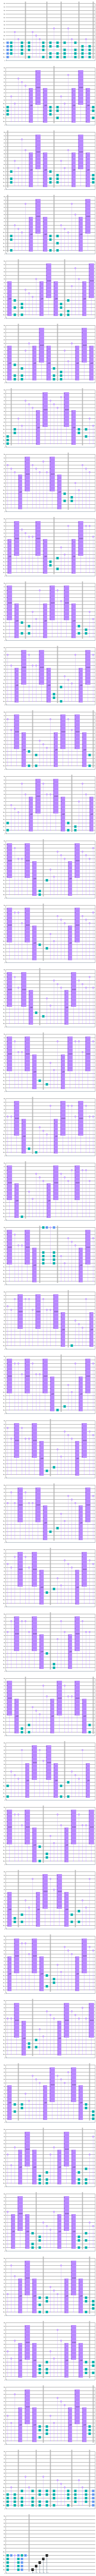

In [4]:
qc=QuantumCircuit(len(vec)+2*l+1,len(vec))

def quan_add_two(a,b):
    for q in range(len(vec)):
        if q!=a:
            if q!=b:
                qc.x(q)
    for p in range(l):
        if val_bin[a,p]==1:
            qc.mct([0,1,2,3,4],len(vec)+l-(p+1)) 
    for q in range(l):
        if val_bin[b,q]==1:
            qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1)) 
    qc.append(QFT(l,do_swaps=False).control(len(vec)),[0,1,2,3,4,5,6,7,8,9])
    qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    qc.append(QFT(l,do_swaps=False).inverse().control(len(vec)),[0,1,2,3,4,5,6,7,8,9])
    for q in range(len(vec)):
        if q!=a:
            if q!=b:
                qc.x(q)
    qc.barrier()

def quan_add_three(a,b,c):
    for q in range(len(vec)):
        if q!=a:
            if q!=b:
                if q!=c:
                    qc.x(q)
    for p in range(l):
        if val_bin[a,p]==1:
            qc.mct([0,1,2,3,4],len(vec)+l-(p+1)) 
    for q in range(l):
        if val_bin[b,q]==1:
            qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1)) 
    qc.append(QFT(l,do_swaps=False).control(len(vec)),[0,1,2,3,4,5,6,7,8,9])
    qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    for q in range(l):
        if val_bin[b,q]==1:
            qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
    for q in range(l):
        if val_bin[c,q]==1:
            qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
    qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    qc.append(QFT(l,do_swaps=False).inverse().control(len(vec)),[0,1,2,3,4,5,6,7,8,9])
    for q in range(len(vec)):
        if q!=a:
            if q!=b:
                if q!=c:
                    qc.x(q)
    qc.barrier()       
    

    
def quan_add_four(a,b,c,d):
    for q in range(len(vec)):
        if q!=a:
            if q!=b:
                if q!=c:
                    if q!=d:
                        qc.x(q)
    for p in range(l):
        if val_bin[a,p]==1:
            qc.mct([0,1,2,3,4],len(vec)+l-(p+1)) 
    for q in range(l):
        if val_bin[b,q]==1:
            qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1)) 
    qc.append(QFT(l,do_swaps=False).control(len(vec)),[0,1,2,3,4,5,6,7,8,9])
    qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    for q in range(l):
        if val_bin[b,q]==1:
            qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
    for q in range(l):
        if val_bin[c,q]==1:
            qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
    qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    for q in range(l):
        if val_bin[c,q]==1:
            qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
    for q in range(l):
        if val_bin[d,q]==1:
            qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
    qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    qc.append(QFT(l,do_swaps=False).inverse().control(len(vec)),[0,1,2,3,4,5,6,7,8,9])
    for q in range(len(vec)):
        if q!=a:
            if q!=b:
                if q!=c:
                    if q!=d:
                        qc.x(q)
    qc.barrier()
    


#Creating superposition state
qc.h(range(len(vec)))

for i in range(len(vec)):
    if i<=0:
        #Writing the values
        for n in range(len(vec)):
            for q in range(len(vec)):
                if q!=n:
                    qc.x(q)
            for m in range(l):
                if val_bin[n,m]==1:
                    qc.mct([0,1,2,3,4],len(vec)+l-(m+1))
            for q in range(len(vec)):
                if q!=n:
                    qc.x(q)
            qc.barrier()

        #Adding two strings
        quan_add_two(0,1)
        quan_add_two(0,2)
        quan_add_two(0,3)
        quan_add_two(0,4)
        quan_add_two(1,2)
        quan_add_two(1,3)
        quan_add_two(1,4)
        quan_add_two(2,3)
        quan_add_two(2,4)
        quan_add_two(3,4)


        #Adding three strings
        quan_add_three(0,1,2)
        quan_add_three(0,1,3)
        quan_add_three(0,1,4)
        quan_add_three(0,2,3)
        quan_add_three(0,2,4)
        quan_add_three(0,3,4)
        quan_add_three(1,2,3)
        quan_add_three(1,2,4)
        quan_add_three(1,3,4)
        quan_add_three(2,3,4)


        #Adding four strings
        quan_add_four(0,1,2,3)
        quan_add_four(0,1,2,4)
        quan_add_four(0,1,3,4)
        quan_add_four(0,2,3,4)
        quan_add_four(1,2,3,4)


        #Adding five strings
        for p in range(l):
            if val_bin[0,p]==1:
                qc.mct([0,1,2,3,4],len(vec)+l-(p+1)) 
        for q in range(l):
            if val_bin[1,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1)) 
        qc.append(QFT(l,do_swaps=False).control(len(vec)),[0,1,2,3,4,5,6,7,8,9])
        qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
        for q in range(l):
            if val_bin[1,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        for q in range(l):
            if val_bin[2,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
        for q in range(l):
            if val_bin[2,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        for q in range(l):
            if val_bin[3,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
        for q in range(l):
            if val_bin[3,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        for q in range(l):
            if val_bin[4,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
        qc.append(QFT(l,do_swaps=False).inverse().control(len(vec)),[0,1,2,3,4,5,6,7,8,9])
        qc.barrier()

        #Oracle
        qc.x(len(vec)+2*l)
        qc.h(len(vec)+2*l)
        for n in range(l):
            if num_bin[n]==0:
                qc.x(len(vec)+l-(n+1))
        qc.mct([5,6,7,8,9],len(vec)+2*l)
        for n in range(l):
            if num_bin[n]==0:
                qc.x(len(vec)+l-(n+1))
        qc.h(len(vec)+2*l)
        qc.barrier()

        #Adding five strings
        for p in range(l):
            if val_bin[0,p]==1:
                qc.mct([0,1,2,3,4],len(vec)+l-(p+1)) 
        for q in range(l):
            if val_bin[1,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1)) 
        qc.append(QFT(l,do_swaps=False).control(len(vec)),[0,1,2,3,4,5,6,7,8,9])
        qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
        for q in range(l):
            if val_bin[1,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        for q in range(l):
            if val_bin[2,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
        for q in range(l):
            if val_bin[2,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        for q in range(l):
            if val_bin[3,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
        for q in range(l):
            if val_bin[3,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        for q in range(l):
            if val_bin[4,q]==1:
                qc.mct([0,1,2,3,4],len(vec)+2*l-(q+1))
        qc.append(R_Gate.control(len(vec)),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
        qc.append(QFT(l,do_swaps=False).inverse().control(len(vec)),[0,1,2,3,4,5,6,7,8,9])
        qc.barrier()

        quan_add_four(1,2,3,4)
        quan_add_four(0,2,3,4)
        quan_add_four(0,1,3,4)
        quan_add_four(0,1,2,4)
        quan_add_four(0,1,2,3)

        quan_add_three(2,3,4)
        quan_add_three(1,3,4)
        quan_add_three(1,2,4)
        quan_add_three(1,2,3)
        quan_add_three(0,3,4)
        quan_add_three(0,2,4)
        quan_add_three(0,2,3)
        quan_add_three(0,1,4)
        quan_add_three(0,1,3)
        quan_add_three(0,1,2)

        quan_add_two(3,4)
        quan_add_two(2,4)
        quan_add_two(2,3)
        quan_add_two(1,4)
        quan_add_two(1,3)
        quan_add_two(1,2)
        quan_add_two(0,4)
        quan_add_two(0,3)
        quan_add_two(0,2)
        quan_add_two(0,1)


        for n in reversed(range(len(vec))):
            for q in range(len(vec)):
                if q!=n:
                    qc.x(q)
            for m in range(l):
                if val_bin[n,m]==1:
                    qc.mct([0,1,2,3,4],len(vec)+l-(m+1))
            for q in range(len(vec)):
                if q!=n:
                    qc.x(q)
            qc.barrier()

        qc.h(range(len(vec)))
        qc.x(range(len(vec)))
        qc.h(len(vec)-1)
        qc.mct([0,1,2,3],4)
        qc.h(len(vec)-1)
        qc.x(range(len(vec)))
        qc.h(range(len(vec)))
        qc.barrier()

qc.measure(range(len(vec)),range(len(vec)))
qc=qc.reverse_bits()
qc.draw('mpl')

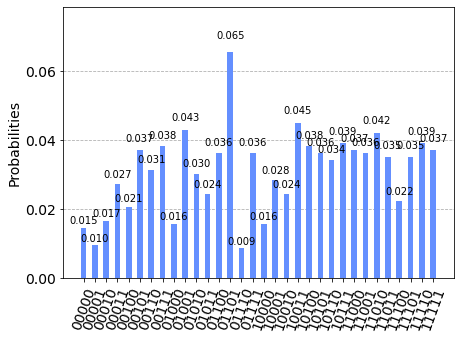

In [5]:
backend=Aer.get_backend('qasm_simulator')
job=execute(qc,backend,shots=1024)
result=job.result()
counts=result.get_counts()
plot_histogram(counts)